# Importation des bibliothèques

In [1]:
import pandas as pd
import numpy as np

#DataViz
import seaborn as sns
import matplotlib.pyplot as plt

#SQL
import mysql.connector as sql 
pwd='Maroc.93600'

In [2]:
df = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head(5)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [6]:
df.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [7]:
df.index

RangeIndex(start=0, stop=1573, step=1)

In [8]:
df.values

array([['2020 Summer Vintage Flamingo Print  Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets',
        '2020 Summer Vintage Flamingo Print  Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets',
        16.0, ..., '5e9ae51d43d6a96e303acdb0', 'summer', '2020-08'],
       ['SSHOUSE Summer Casual Sleeveless Soirée Party Soirée sans manches Vêtements de plage sexy Mini robe femme wshC1612242400387A21',
        "Women's Casual Summer Sleeveless Sexy Mini Dress", 8.0, ...,
        '58940d436a0d3d5da4e95a38', 'summer', '2020-08'],
       ['2020 Nouvelle Arrivée Femmes Printemps et Été Plage Porter Longue Mince Cardigan Ouvert Avant Kimono Vert Feuille Imprimé En Mousseline de Soie Cardigan S-5XL',
        '2020 New Arrival Women Spring and Summer Beach Wear Long Thin Cardigan Open Front Kimono Green Leaf Printed Chiffon Cardigan S-5XL',
        8.0, ..., '5ea10e2c617580260d55310a', 'summer', '2020

In [9]:
df.shape

(1573, 43)

In [10]:
df.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,...,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,...,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,...,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,...,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,...,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,...,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


### Nombre de valeurs manquantes par colonne

In [11]:
df.isna().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [12]:
df['product_variation_size_id'].value_counts()

S                      641
XS                     356
M                      200
XXS                    100
L                       49
                      ... 
6XL                      1
AU plug Low quality      1
XXXL                     1
25-S                     1
SIZE S                   1
Name: product_variation_size_id, Length: 106, dtype: int64

In [13]:
df['product_color'].unique()

array(['white', 'green', 'leopardprint', 'black', 'yellow', 'navyblue',
       'blue', 'beige', 'grey', 'lightblue', 'orange', 'red', 'Black',
       'armygreen', nan, 'pink', 'khaki', 'red & blue', 'blue & pink',
       'RED', 'white & green', 'winered', 'black & green', 'purple',
       'whitefloral', 'floral', 'fluorescentgreen', 'orange & camouflage',
       'lightyellow', 'coolblack', 'multicolor', 'camouflage',
       'lightpink', 'pink & black', 'silver', 'Army green', 'lightgreen',
       'mintgreen', 'pink & grey', 'gray', 'coffee', 'rose',
       'light green', 'leopard', 'black & white', 'orange-red',
       'dustypink', 'White', 'star', 'white & black', 'apricot',
       'skyblue', 'burgundy', 'claret', 'pink & white', 'rosered', 'tan',
       'navy blue', 'wine red', 'lightred', 'Pink', 'coralred', 'brown',
       'lakeblue', 'darkblue', 'camel', 'pink & blue', 'nude', 'Blue',
       'lightpurple', 'army', 'black & stripe', 'Rose red',
       'greysnakeskinprint', 'denimbl

# Définition de l'axe d'analyse (prédiction ML)

# Preprocessing

# Nettoyage Dataframe

In [14]:
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [15]:
df.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [16]:
df['currency_buyer'].value_counts()

EUR    1573
Name: currency_buyer, dtype: int64

Text(0.5, 1.0, 'origin_country distribution')

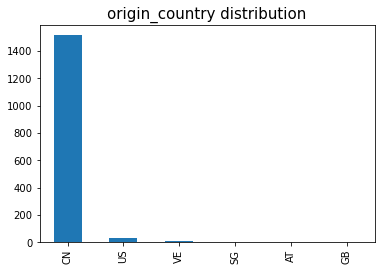

In [17]:
df['origin_country'].value_counts().plot(kind='bar');
plt.title('origin_country distribution', fontsize=15)

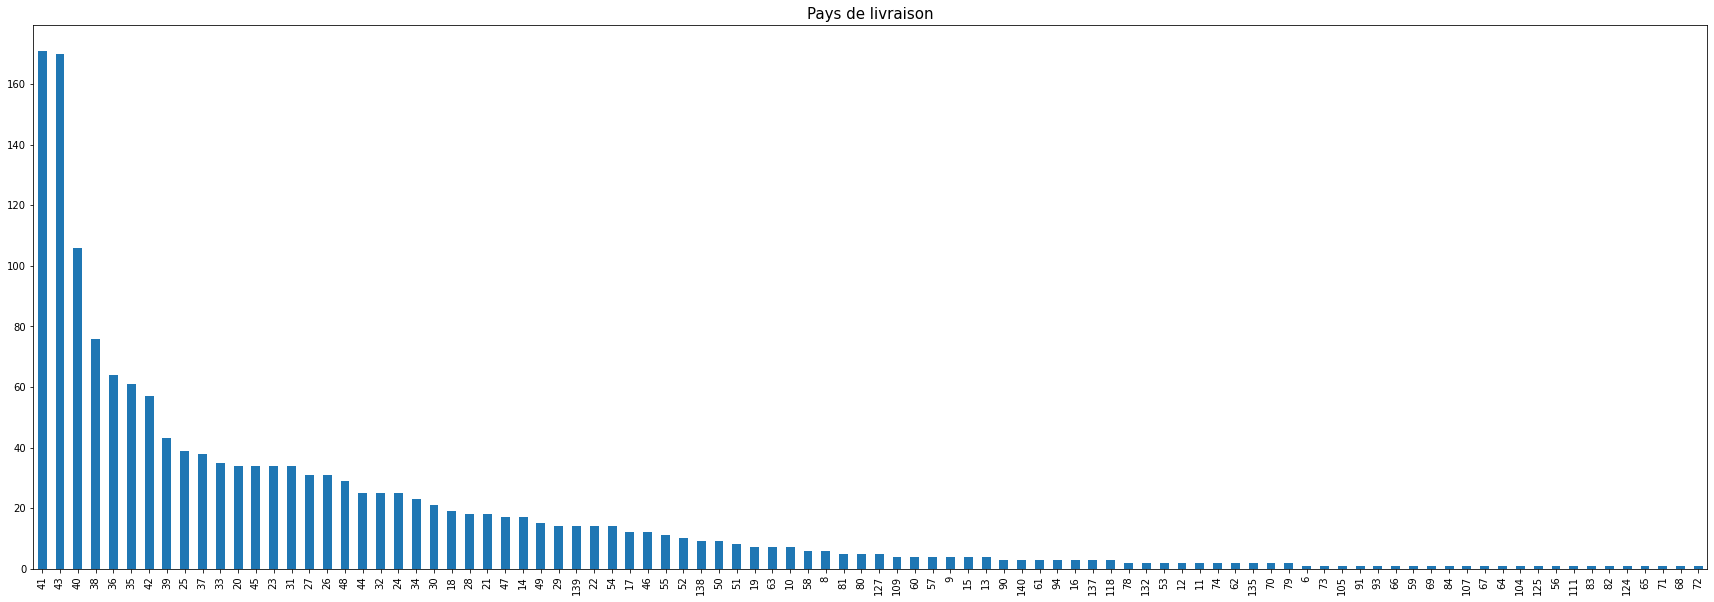

In [18]:
plt.figure(figsize=(30,10))
df['countries_shipped_to'].value_counts().plot(kind='bar');
plt.title('Pays de livraison', fontsize=15);

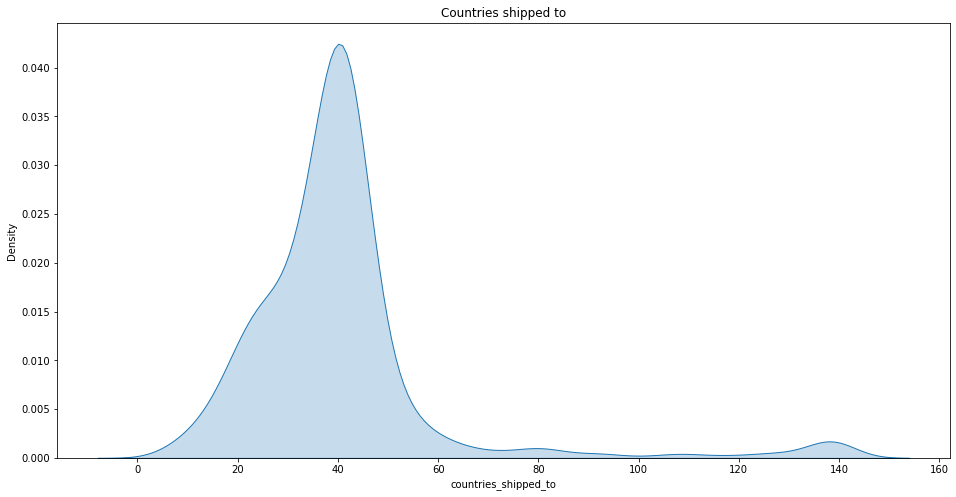

In [19]:
plt.figure(figsize=(16,8))
sns.kdeplot(df['countries_shipped_to'], shade=True).set(title="Countries shipped to");

In [20]:
columns_to_drop = ['title_orig', 'rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count',
                   'rating_one_count',  'tags', 'inventory_total', 'shipping_option_name', 'urgency_text', 
                   'origin_country', 'merchant_title', 'merchant_name', 'merchant_info_subtitle', 'merchant_id', 
                   'merchant_profile_picture', 'product_url', 'product_id', 'theme', 'crawl_month', 'product_picture']
                   

In [21]:
df.drop(columns_to_drop, axis=1, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   price                         1573 non-null   float64
 2   retail_price                  1573 non-null   int64  
 3   currency_buyer                1573 non-null   object 
 4   units_sold                    1573 non-null   int64  
 5   uses_ad_boosts                1573 non-null   int64  
 6   rating                        1573 non-null   float64
 7   rating_count                  1573 non-null   int64  
 8   badges_count                  1573 non-null   int64  
 9   badge_local_product           1573 non-null   int64  
 10  badge_product_quality         1573 non-null   int64  
 11  badge_fast_shipping           1573 non-null   int64  
 12  product_color                 1532 non-null   object 
 13  pro

In [23]:
df.head(2)

,title,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,...,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,0,0,...,white,M,50,4,0,34,1.0,568,4.128521,0
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.0,22,EUR,20000,1,3.45,6135,0,0,...,green,XS,50,2,0,41,1.0,17752,3.899673,0


In [24]:
#df.product_variation_size_id.unique()

In [25]:
df['price'].unique()

array([16.  ,  8.  ,  2.72,  3.92,  7.  , 12.  , 11.  ,  5.78,  5.79,
        6.  ,  1.91,  2.  ,  5.  ,  9.  ,  5.71,  5.65,  1.74, 14.  ,
        2.66,  5.8 , 13.  ,  3.69,  5.84,  1.  ,  5.87,  4.94,  5.83,
        5.77,  5.9 ,  1.72,  1.86, 20.  ,  5.66,  5.81,  5.68, 17.  ,
        5.86,  3.66,  1.68,  4.81, 18.  ,  3.78,  3.  ,  5.74,  3.67,
       22.  , 19.  ,  4.83,  5.85, 15.  ,  5.69,  1.89,  4.  ,  3.85,
        4.7 ,  4.84,  3.7 ,  1.77,  3.73,  1.75,  5.89,  2.71,  5.7 ,
        5.72,  5.92, 24.  ,  1.8 ,  3.79,  1.65,  2.83,  1.85,  3.86,
        2.76,  3.83,  3.93,  3.94,  4.67,  3.76,  4.73,  4.74,  5.95,
        3.65,  2.81,  4.66,  2.8 ,  3.87,  5.75, 49.  , 23.  ,  5.73,
        3.68,  4.86,  3.91,  3.88,  2.79,  1.76,  4.69,  4.65,  2.67,
        1.71,  2.7 ,  3.81,  3.9 ,  4.68,  3.84,  4.9 , 25.  ,  2.65,
        1.7 ,  3.74,  5.82,  3.71,  2.89,  5.67,  5.88,  4.93, 26.  ,
        2.9 ,  1.88,  1.66,  4.88,  2.69,  1.67,  1.84,  3.72, 27.  ,
        5.91])

In [26]:
df['has_urgency_banner'].unique()

array([ 1., nan])

In [27]:
#Remplacer les valeurs manquantes par 0
#1 -> Bannière d'urgence
#0 -> Pas de bannière d'urgence
df['has_urgency_banner'] = df['has_urgency_banner'].fillna(0)
df['has_urgency_banner'] = df['has_urgency_banner'].astype(int)

In [28]:
df['has_urgency_banner'].unique()

array([1, 0])

In [29]:
df.columns

Index(['title', 'price', 'retail_price', 'currency_buyer', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'has_urgency_banner',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture'],
      dtype='object')

In [30]:
df['merchant_has_profile_picture'].unique()

array([0, 1], dtype=int64)

### Vérification du nombre de nan

In [31]:
df.isna().sum()

title                            0
price                            0
retail_price                     0
currency_buyer                   0
units_sold                       0
uses_ad_boosts                   0
rating                           0
rating_count                     0
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
product_color                   41
product_variation_size_id       14
product_variation_inventory      0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
has_urgency_banner               0
merchant_rating_count            0
merchant_rating                  0
merchant_has_profile_picture     0
dtype: int64

### Drop duplicated

In [32]:
df.duplicated().sum()

34

In [33]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [34]:
df.duplicated().sum()

0

In [35]:
df.isna().sum()

title                            0
price                            0
retail_price                     0
currency_buyer                   0
units_sold                       0
uses_ad_boosts                   0
rating                           0
rating_count                     0
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
product_color                   41
product_variation_size_id       14
product_variation_inventory      0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
has_urgency_banner               0
merchant_rating_count            0
merchant_rating                  0
merchant_has_profile_picture     0
dtype: int64

### Traiter les valeurs nulles et convertir les valeurs de product_color

In [36]:
df['product_color'].unique()

array(['white', 'green', 'leopardprint', 'black', 'yellow', 'navyblue',
       'blue', 'beige', 'grey', 'lightblue', 'orange', 'red', 'Black',
       'armygreen', nan, 'pink', 'khaki', 'red & blue', 'blue & pink',
       'RED', 'white & green', 'winered', 'black & green', 'purple',
       'whitefloral', 'floral', 'fluorescentgreen', 'orange & camouflage',
       'lightyellow', 'coolblack', 'multicolor', 'camouflage',
       'lightpink', 'pink & black', 'silver', 'Army green', 'lightgreen',
       'mintgreen', 'pink & grey', 'gray', 'coffee', 'rose',
       'light green', 'leopard', 'black & white', 'orange-red',
       'dustypink', 'White', 'star', 'white & black', 'apricot',
       'skyblue', 'burgundy', 'claret', 'pink & white', 'rosered', 'tan',
       'navy blue', 'wine red', 'lightred', 'Pink', 'coralred', 'brown',
       'lakeblue', 'darkblue', 'camel', 'pink & blue', 'nude', 'Blue',
       'lightpurple', 'army', 'black & stripe', 'Rose red',
       'greysnakeskinprint', 'denimbl

In [37]:
df['product_color'].value_counts()

black                 298
white                 246
yellow                101
pink                   97
blue                   96
                     ... 
Rose red                1
greysnakeskinprint      1
denimblue               1
offwhite                1
gold                    1
Name: product_color, Length: 101, dtype: int64

In [38]:
nb_color = df['product_color'].value_counts()
nb_color = nb_color.reset_index()
nb_color

,index,product_color
0,black,298
1,white,246
2,yellow,101
3,pink,97
4,blue,96
...,...,...
96,Rose red,1
97,greysnakeskinprint,1
98,denimblue,1
99,offwhite,1


In [39]:
nb_color['percentage'] = (nb_color['product_color'] / df.shape[0])*100 #nb Couleur/ nb total de couleurs
nb_color.head(15)

,index,product_color,percentage
0,black,298,19.363223
1,white,246,15.984405
2,yellow,101,6.562703
3,pink,97,6.302794
4,blue,96,6.237817
5,red,92,5.977908
6,green,86,5.588044
7,grey,70,4.548408
8,purple,53,3.443795
9,armygreen,31,2.014295


In [40]:
df.isna().sum()

title                            0
price                            0
retail_price                     0
currency_buyer                   0
units_sold                       0
uses_ad_boosts                   0
rating                           0
rating_count                     0
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
product_color                   41
product_variation_size_id       14
product_variation_inventory      0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
has_urgency_banner               0
merchant_rating_count            0
merchant_rating                  0
merchant_has_profile_picture     0
dtype: int64

In [41]:
color_convert_dict = {
        'white':'white', 
        'green':'green',
        'leopardprint':'other',
        'black':'black',
        'yellow':'yellow', 
        'navyblue':'blue',
        'blue':'blue', 
        'beige':'beige',
        'grey':'grey',
        'lightblue':'blue',
        'orange':'orange', 
        'red':'red',
        'Black':'black',
        'armygreen':'green',
        #'nan':'other',
        'pink':'pink',
        'khaki':'green', 
        'red & blue':'multicolor', 
        'blue & pink':'multicolor',
        'RED':'red', 
        'white & green':'multicolor',
        'winered':'red',
        'black & green':'multicolor',
        'purple':'purple',
        'whitefloral':'white',
        'floral':'other', 
        'fluorescentgreen':'green', 
        'orange & camouflage':'orange',
        'lightyellow':'yellow', 
        'coolblack':'black',
        'multicolor':'multicolor',
        'camouflage':'other',
        'lightpink':'pink',
        'pink & black':'multicolor', 
        'silver':'other',
        'Army green':'green', 
        'lightgreen':'green',
        'mintgreen':'green',
        'pink & grey':'multicolor', 
        'gray':'grey', 
        'coffee':'other',
        'rose':'pink',
        'light green':'green', 
        'leopard':'other',
        'black & white':'multicolor',
        'orange-red':'red',
        'dustypink':'pink', 
        'White':'white', 
        'star':'other',
        'white & black':'multicolor', 
        'apricot':'orange',
        'skyblue':'blue',
        'burgundy':'red', 
        'claret':'purple',
        'pink & white':'multicolor',
        'rosered':'red',
        'tan':'other',
        'navy blue':'blue', 
        'wine red':'red',
        'lightred':'red', 
        'Pink':'pink', 
        'coralred':'red', 
        'brown':'other',
        'lakeblue':'blue', 
        'darkblue':'blue', 
        'camel':'yellow', 
        'pink & blue':'multicolor',
        'nude':'other', 
        'Blue':'blue',
        'lightpurple':'purple', 
        'army':'other',
        'black & stripe':'multicolor', 
        'Rose red':'red',
        'greysnakeskinprint':'other',
        'denimblue':'blue', 
        'applegreen':'green', 
        'offwhite':'white',
        'lightgray':'grey',
        'navy':'blue', 
        'gray & white':'multicolor', 
        'brown & yellow':'multicolor',
        'winered & yellow':'multicolor', 
        'army green':'green', 
        'whitestripe':'white',
        'rainbow':'other',
        'lightgrey':'grey',
        'watermelonred':'red',
        'prussianblue':'blue', 
        'navyblue & white':'multicolor',
        'white & red':'multicolor',
        'wine':'red', 
        'ivory':'white',
        'black & yellow':'multicolor', 
        'jasper':'other',
        'lightkhaki':'green', 
        'offblack':'black',
        'violet':'purple',
        'black & blue':'multicolor',
        'blackwhite':'other',
        'darkgreen':'green', 
        'rosegold':'pink'
}

In [42]:
df['product_color'] = df['product_color'].map(color_convert_dict)

In [43]:
df.shape

(1539, 22)

In [44]:
df['product_color'].value_counts()

black         304
white         254
blue          159
green         145
red           142
pink          111
yellow        105
grey           82
multicolor     59
purple         56
other          36
orange         30
beige          14
Name: product_color, dtype: int64

In [45]:
df.isna().sum()

title                            0
price                            0
retail_price                     0
currency_buyer                   0
units_sold                       0
uses_ad_boosts                   0
rating                           0
rating_count                     0
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
product_color                   42
product_variation_size_id       14
product_variation_inventory      0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
has_urgency_banner               0
merchant_rating_count            0
merchant_rating                  0
merchant_has_profile_picture     0
dtype: int64

### Remplacer les nan

In [46]:
df['product_color'] = df['product_color'].fillna('other')
df['product_color'].unique()

array(['white', 'green', 'other', 'black', 'yellow', 'blue', 'beige',
       'grey', 'orange', 'red', 'pink', 'multicolor', 'purple'],
      dtype=object)

In [47]:
df.isna().sum()

title                            0
price                            0
retail_price                     0
currency_buyer                   0
units_sold                       0
uses_ad_boosts                   0
rating                           0
rating_count                     0
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
product_color                    0
product_variation_size_id       14
product_variation_inventory      0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
has_urgency_banner               0
merchant_rating_count            0
merchant_rating                  0
merchant_has_profile_picture     0
dtype: int64

In [48]:
nb_color = df['product_color'].value_counts()
nb_color = nb_color.reset_index()
nb_color

,index,product_color
0,black,304
1,white,254
2,blue,159
3,green,145
4,red,142
5,pink,111
6,yellow,105
7,grey,82
8,other,78
9,multicolor,59


In [49]:
nb_color['percentage'] = (nb_color['product_color'] / df.shape[0])*100 #nb Couleur/ nb total de couleurs
nb_color.head(15)

,index,product_color,percentage
0,black,304,19.753086
1,white,254,16.504224
2,blue,159,10.331384
3,green,145,9.421702
4,red,142,9.226771
5,pink,111,7.212476
6,yellow,105,6.822612
7,grey,82,5.328135
8,other,78,5.068226
9,multicolor,59,3.833658


In [50]:
df.groupby('product_color').mean()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
product_color,,,,,,,,,,,,,,,,,,
beige,10.627143,36.142857,2835.714286,0.428571,3.877857,497.785714,0.000000,0.000000,0.000000,0.000000,31.571429,3.071429,0.000000,34.071429,0.214286,7362.714286,4.057355,0.142857
black,8.751086,26.263158,5260.700658,0.444079,3.881086,1243.707237,0.134868,0.016447,0.101974,0.016447,38.921053,2.437500,0.000000,43.940789,0.345395,33327.921053,4.063294,0.157895
blue,8.710000,22.025157,3632.691824,0.459119,3.744843,702.748428,0.050314,0.006289,0.044025,0.000000,33.251572,2.402516,0.000000,45.157233,0.276730,20469.333333,3.999788,0.113208
green,7.711517,24.834483,3986.103448,0.510345,3.798828,729.744828,0.082759,0.013793,0.048276,0.020690,27.344828,2.165517,0.000000,41.579310,0.358621,17961.193103,4.023147,0.213793
grey,7.096341,17.182927,6225.975610,0.487805,3.877195,1265.256098,0.170732,0.012195,0.146341,0.012195,30.243902,2.085366,0.000000,37.365854,0.256098,58632.658537,4.031699,0.048780
multicolor,9.146441,21.508475,4002.542373,0.372881,3.971695,916.508475,0.186441,0.016949,0.152542,0.016949,33.813559,2.457627,0.000000,36.830508,0.271186,19536.406780,4.046245,0.186441
orange,7.532333,31.266667,6466.933333,0.333333,3.712333,1010.366667,0.100000,0.033333,0.000000,0.066667,29.433333,2.333333,0.000000,37.633333,0.266667,29454.533333,4.005160,0.133333
other,9.601410,25.730769,6379.128205,0.423077,3.961667,1351.346154,0.230769,0.064103,0.115385,0.051282,37.333333,2.910256,0.038462,45.320513,0.307692,30554.089744,4.152100,0.128205
pink,7.768468,18.018018,2890.090090,0.432432,3.668468,543.918919,0.090090,0.009009,0.081081,0.000000,30.567568,2.207207,0.000000,40.747748,0.279279,18382.846847,3.973178,0.162162


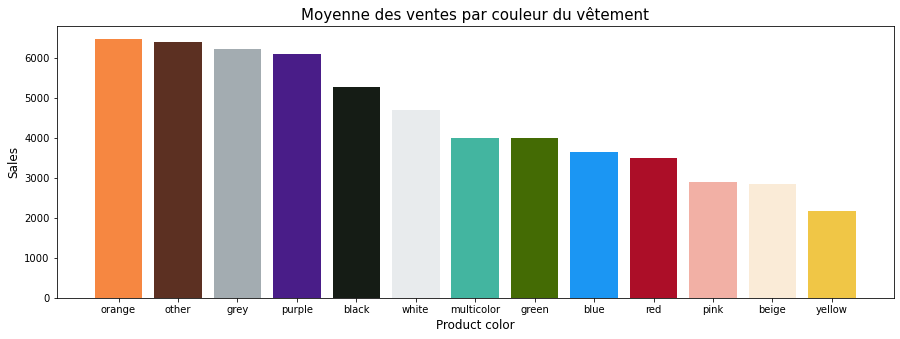

In [51]:
col = ['product_color','units_sold']

tmp_df = df[col]
tmp_df = tmp_df.groupby('product_color').mean()
tmp_df = tmp_df.sort_values(by='units_sold', ascending=False)
tmp_df = tmp_df.reset_index()

colors = ['#f68741', #orange
          '#5c3022', #others
          '#a3acb1', #grey
          '#491d88', #purple 
          '#151c15', #black
          '#e8ebed', #white
          '#43b5a0', #multicolor
          '#446b04', #green
          '#1b96f3', #blue
          '#ac0e28', #red
          '#f2b0a5', #pink
          '#faebd7', #beige
          '#f0c646'  #yellow
         ]

plt.subplots(figsize=(15,5))
plt.bar(tmp_df['product_color'], tmp_df['units_sold'], color=colors)

plt.title('Moyenne des ventes par couleur du vêtement', fontsize=15)
plt.xlabel('Product color', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.show()

In [52]:
tmp_df

,product_color,units_sold
0,orange,6466.933333
1,other,6379.128205
2,grey,6225.975610
3,purple,6097.857143
4,black,5260.700658
5,white,4680.350394
6,multicolor,4002.542373
7,green,3986.103448
8,blue,3632.691824
9,red,3480.985915


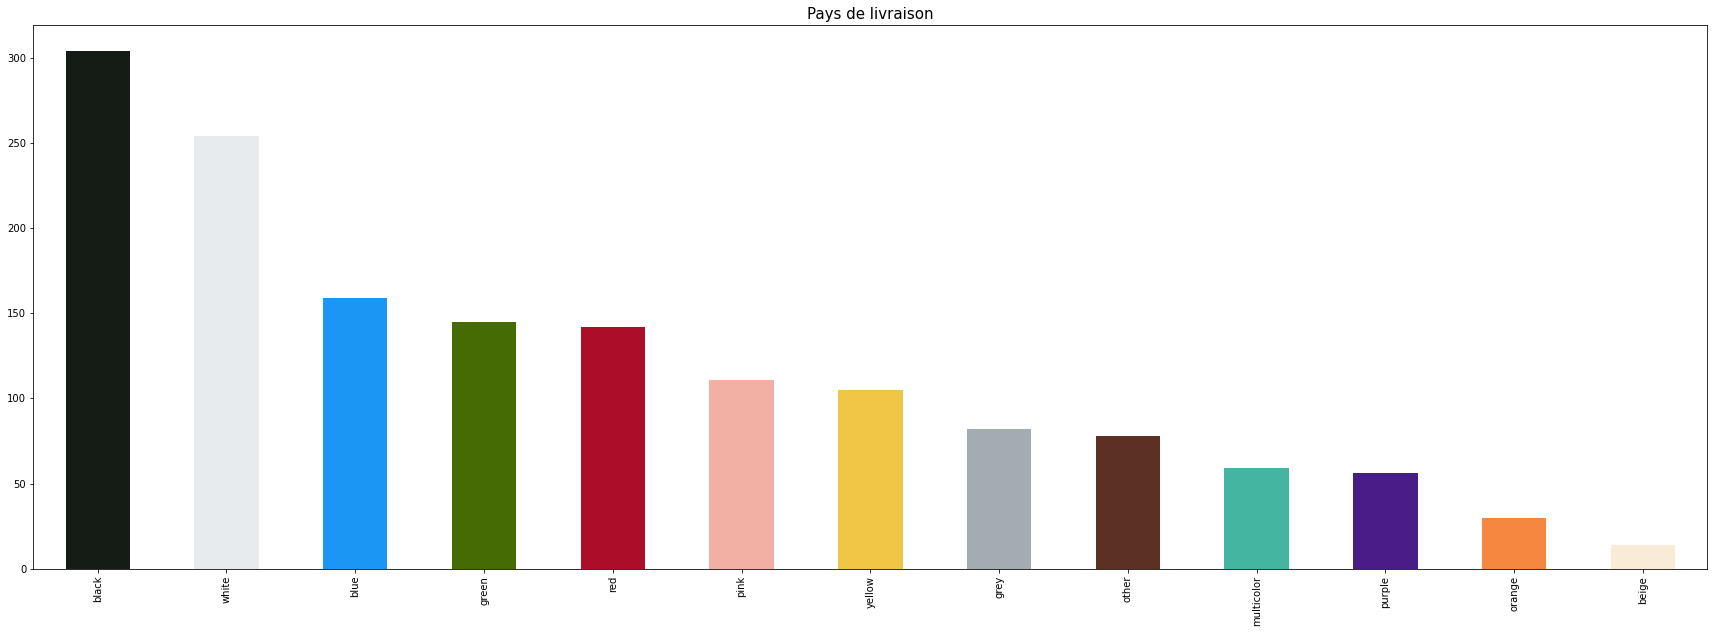

In [53]:
colors=[  '#151c15', #black 
          '#e8ebed', #white
          '#1b96f3', #blue
          '#446b04', #green
          '#ac0e28', #red
          '#f2b0a5', #pink
          '#f0c646',  #yellow
          '#a3acb1', #grey
          '#5c3022', #others
          '#43b5a0', #multicolor
          '#491d88', #purple 
          '#f68741', #orange
          '#faebd7' #beige         
       ]
plt.figure(figsize=(30,10))
df['product_color'].value_counts().plot(kind='bar', color=colors);
plt.title('Pays de livraison', fontsize=15);

In [54]:
plt.bar(tmp_df['product_color'], color=colors)

plt.title('Nombre de produits par couleur', fontsize=15)
plt.xlabel('Product color', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

### Changement valeurs tailles 

# Matrice de corrélation

In [ ]:
corr_df = df.corr()
#corr_df = df.corr(method='pearson')

upp_mat = np.triu(df.corr())

plt.figure(figsize=(24, 16))
sns.heatmap(corr_df, annot=True, mask=upp_mat)
plt.show()

In [ ]:
# sns.pairplot(df, hue="uses_ad_boosts");

In [ ]:
df.head()

In [ ]:
df.title.value_counts()

In [ ]:
df.title.value_counts()

In [ ]:
df.to_csv('table.csv')

In [ ]:
data = pd.read_csv('table.csv', encoding='utf-8')

# SQL Database

In [ ]:
db_connection = sql.connect(host='localhost',                
                            database='ecommerce', 
                            user='root', 
                            password=pwd) 

db_cursor = db_connection.cursor() 
#query = 'desc summer_product'
query = 'select * from summer_product'

pd.read_sql(query, db_connection)

# table_rows = db_cursor.fetchall() 
#df = pd.DataFrame(table_rows)

# DataViz

In [ ]:
df.uses_ad_boosts.value_counts().plot.pie()

In [ ]:
df.badges_count.value_counts()

##### Outliers 

In [ ]:
sns.boxplot(data=df, y='price')

In [ ]:
sns.boxplot(data=df, y='retail_price')

##### Comparaison prix site contre prix en magasin 

In [ ]:
fig = plt.figure(figsize=(30, 1))

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(121)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(122)

df.hist('price', ax=ax1)
df.hist('retail_price', ax=ax2)

In [ ]:
def plot_hist_together(df,label1, label2, bins):
    plt.figure(figsize=(30, 10))
    plt.hist([df[label1], df[label2]], bins, label=[label1, label2])
    title = label1 + ' vs ' + label2
    plt.title(title, fontsize=25)
    plt.legend(fontsize=20)
    plt.show()

bins = np.linspace(0, 250, 40)
plot_hist_together(df, 'price', 'retail_price', bins)

In [ ]:
g=sns.catplot(data=df, kind="bar",
              x="uses_ad_boosts", y="units_sold");

In [ ]:
df.plot.scatter(x='retail_price', y='rating')
plt.title("Relations entre retail_price et rating")
fig.show()

In [ ]:
df.product_color.unique()

In [ ]:
col = ['uses_ad_boosts',
       'units_sold',
       'price',
       'retail_price',
       'rating']

tmp_df = df[col]
tmp_df.groupby('uses_ad_boosts').mean()